In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("auto-mpg.csv", encoding="latin1")  # or encoding="cp1252"
print(df.sample(5))


      mpg  cylinders  displacement horsepower  weight  acceleration  \
90   12.0          8         429.0        198    4952          11.5   
362  24.2          6         146.0        120    2930          13.8   
303  31.8          4          85.0         65    2020          19.2   
254  20.2          6         200.0         85    2965          15.8   
12   15.0          8         400.0        150    3761           9.5   

     model year  origin                  car name  
90           73       1  mercury marquis brougham  
362          81       3         datsun 810 maxima  
303          79       3                datsun 210  
254          78       1      ford fairmont (auto)  
12           70       1     chevrolet monte carlo  


In [3]:
# i want to see which type of data type
da = df.info()
print(da)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [4]:
# wants all coluns name
print(df.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [9]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [6]:
#to seee missing vaalues
clmn_miss = df.isnull().sum()
print(clmn_miss)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [7]:
# to delet missing values
df_cleaned = df.dropna()
print(df_cleaned)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

In [8]:
# i want to see duplicate values
# Check duplicate rows
duplicates = df.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool


In [9]:
# for ex there is any missing values and see how much data is misssing for ex 6 missing values
6/150
#s 0.04% data is misssing

0.04

In [10]:
#select only numeric data
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

print(numeric_df)

summry = df.describe()
print(summry)

      mpg  cylinders  displacement  weight  acceleration  model year  origin
0    18.0          8         307.0    3504          12.0          70       1
1    15.0          8         350.0    3693          11.5          70       1
2    18.0          8         318.0    3436          11.0          70       1
3    16.0          8         304.0    3433          12.0          70       1
4    17.0          8         302.0    3449          10.5          70       1
..    ...        ...           ...     ...           ...         ...     ...
393  27.0          4         140.0    2790          15.6          82       1
394  44.0          4          97.0    2130          24.6          82       2
395  32.0          4         135.0    2295          11.6          82       1
396  28.0          4         120.0    2625          18.6          82       1
397  31.0          4         119.0    2720          19.4          82       1

[398 rows x 7 columns]
              mpg   cylinders  displacement       we

In [11]:
# Select only non-numeric columns
non_numeric_df = df.select_dtypes(exclude='number')

print(non_numeric_df)

    horsepower                   car name
0          130  chevrolet chevelle malibu
1          165          buick skylark 320
2          150         plymouth satellite
3          150              amc rebel sst
4          140                ford torino
..         ...                        ...
393         86            ford mustang gl
394         52                  vw pickup
395         84              dodge rampage
396         79                ford ranger
397         82                 chevy s-10

[398 rows x 2 columns]


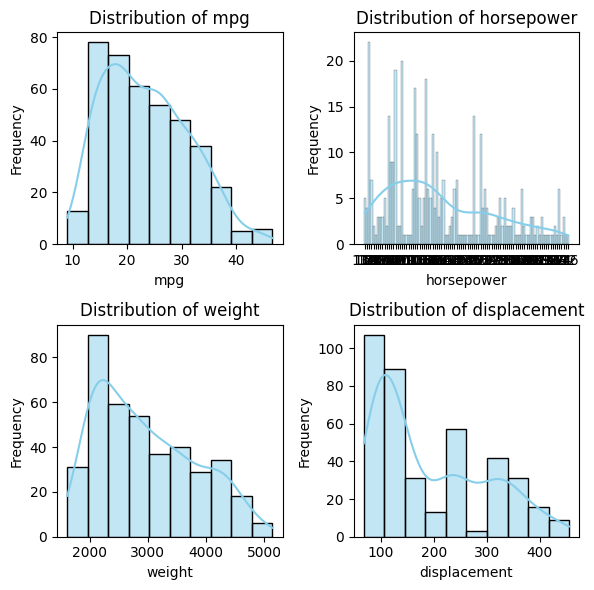

In [13]:
#ploted distribution from mpg , horespower, weight, displacement
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

columns = ['mpg','horsepower','weight','displacement']
axes = axes.flatten()  # flatten 2x2 array to 1D

for i, col in enumerate(columns):
    # Using seaborn to plot distribution
    sns.histplot(df[col], kde=True, bins=10, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


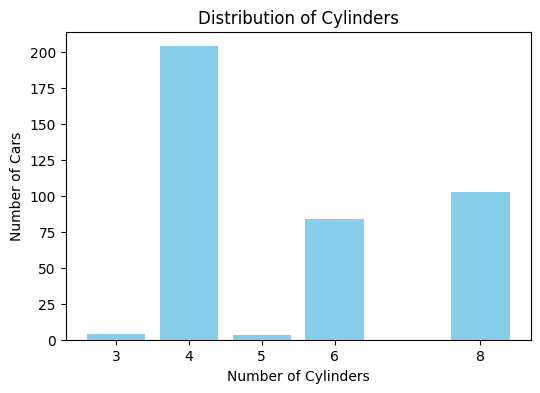

In [14]:
#distribution of cylinders( how many 4 cyliner vs 6 cylinder cars), using matployli library
# Count number of cars per cylinder type
cyl_counts = df['cylinders'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(cyl_counts.index, cyl_counts.values, color='skyblue')
plt.xlabel('Number of Cylinders')
plt.ylabel('Number of Cars')
plt.title('Distribution of Cylinders')
plt.xticks(cyl_counts.index)  # show all cylinder numbers on x-axis
plt.show()


In [15]:
#single variable analysis 
#how many cylinder cars count

# Count of cars per cylinder type
cyl_counts = df['cylinders'].value_counts()
print(cyl_counts)


cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64


In [16]:
#in %
# Count of cars per cylinder type in percentage
cyl_percent = df['cylinders'].value_counts(normalize=True) * 100
print(cyl_percent)


cylinders
4    51.256281
8    25.879397
6    21.105528
3     1.005025
5     0.753769
Name: proportion, dtype: float64


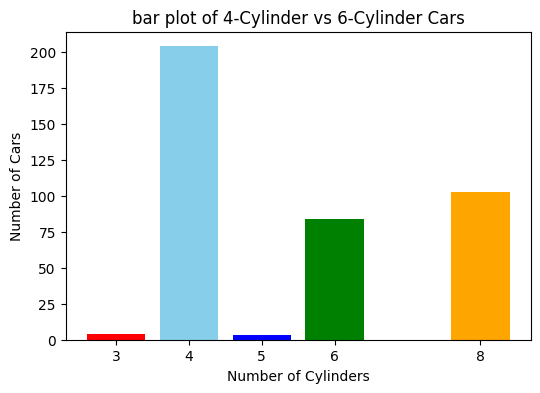

In [21]:
#distribution of 6 cyilender vs 4 cylinder  cars plot graph in python
# Count of 4 and 6 cylinder cars
cyl_counts = df['cylinders'].value_counts()
cyl_counts = cyl_counts[[4,8,3,5,6]]  # Select only 4 and 6 cylinders

# Bar chart
plt.figure(figsize=(6,4))
plt.bar(cyl_counts.index, cyl_counts.values, color=['skyblue', 'orange', 'red','blue','green'])
plt.xlabel('Number of Cylinders')
plt.ylabel('Number of Cars')
plt.title('bar plot of 4-Cylinder vs 6-Cylinder Cars')
plt.xticks([4,8,3,5,6])
plt.show()

# Sort in decreasing order
#cyl_counts = cyl_counts.sort_values(ascending=False)



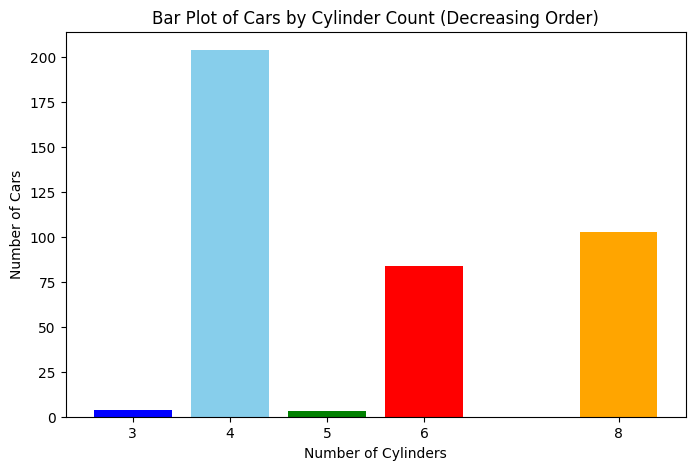

In [25]:

# Count of cars per cylinder type
# Count of cars per cylinder type

# Count of cars per cylinder type
cyl_counts = df['cylinders'].value_counts()

# Select only desired cylinder types
cyl_counts = cyl_counts[[4,8,3,5,6]]

# Sort counts in decreasing order (no 'by' needed for Series)
cyl_counts = cyl_counts.sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(cyl_counts.index, cyl_counts.values, 
        color=['skyblue', 'orange', 'red','blue','green'])
plt.xlabel('Number of Cylinders')
plt.ylabel('Number of Cars')
plt.title('Bar Plot of Cars by Cylinder Count (Decreasing Order)')
plt.xticks(cyl_counts.index)  # ensure all cylinder types appear
plt.show()


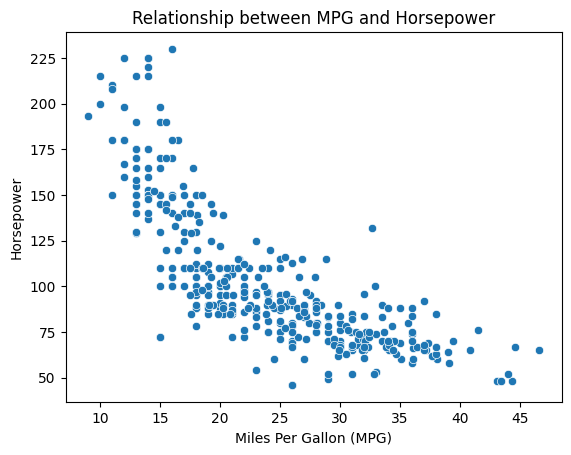

                 mpg  horsepower
mpg         1.000000   -0.778427
horsepower -0.778427    1.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='mpg', y='horsepower', data=df)
plt.title('Relationship between MPG and Horsepower')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Horsepower')
plt.show()
print(df[['mpg', 'horsepower']].corr())



i was facing an issue my graph showing no relation btw horsepower and mpg and ik that there is a relation 
the issue was the horsepower column was object and so i change it to float

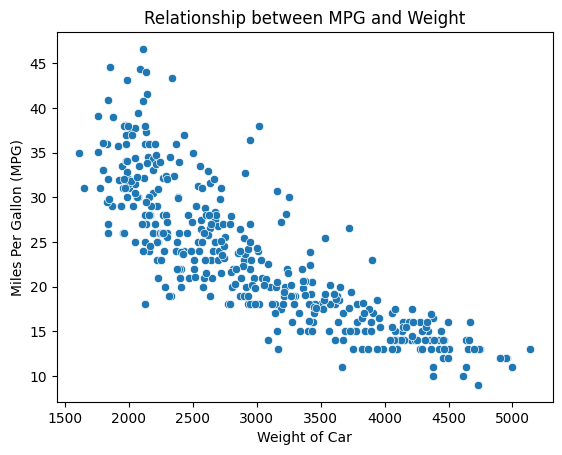

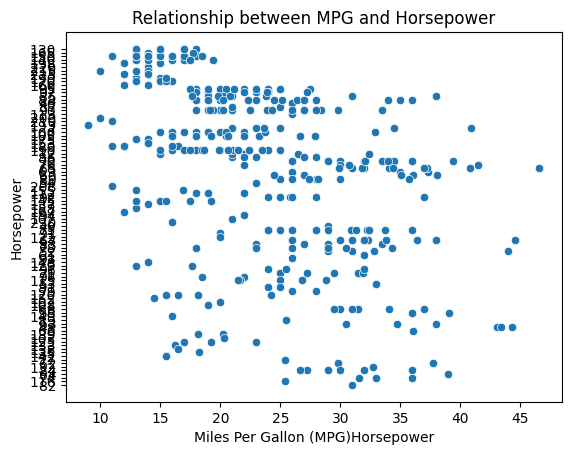

In [29]:
#relationship analysis
#mpg vs weight(litter car must have higher mpg)
#give me python commmsand to perform this
# Scatter plot
sns.scatterplot(x='weight', y='mpg', data=df)
plt.title('Relationship between MPG and Weight')
plt.xlabel('Weight of Car')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

# Scatter plot
sns.scatterplot(x='mpg', y='horsepower', data=df)
plt.title('Relationship between MPG and Horsepower')
plt.xlabel('Miles Per Gallon (MPG)Horsepower')
plt.ylabel('Horsepower')
plt.show()



C:\Users\csaaj\AppData\Local\Temp\ipykernel_12076\3009260212.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cylinders', y='mpg', data=df, palette='pastel')


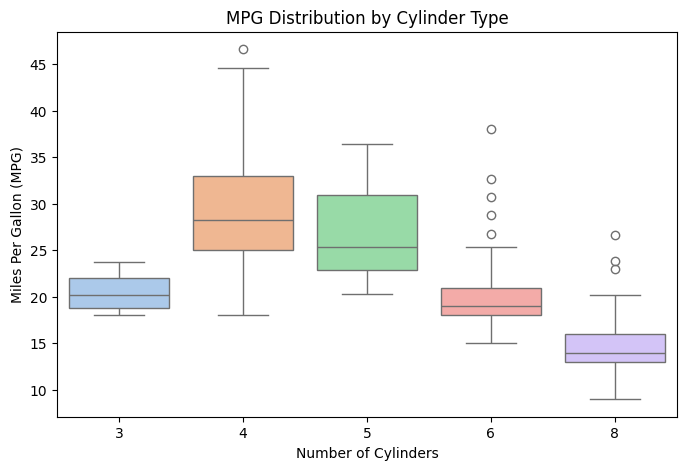

In [30]:
#mpg distribution for cylinder this time do with this 
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='cylinders', y='mpg', data=df, palette='pastel')
plt.title('MPG Distribution by Cylinder Type')
plt.xlabel('Number of Cylinders')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()


C:\Users\csaaj\AppData\Local\Temp\ipykernel_12076\751361088.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='origin', y='mpg', data=df, palette='pastel')


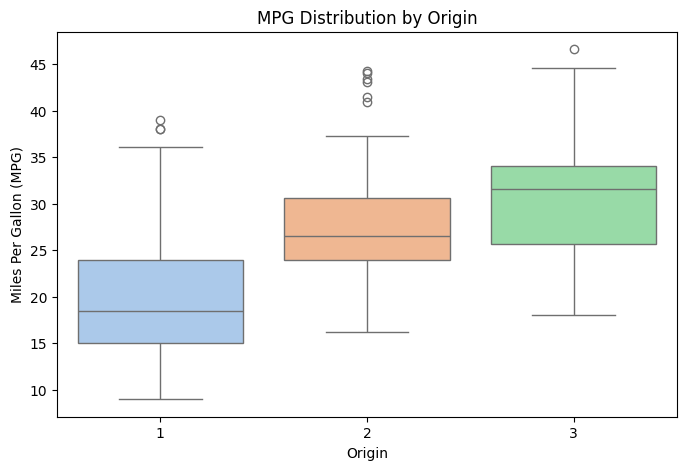

In [38]:
#mpg distribution by origin
# Boxplot

# Corrected Boxplot
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='origin', y='mpg', data=df, palette='pastel')
plt.title('MPG Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()



Correlation of numeric features with MPG:
                    mpg
mpg           1.000000
model year    0.579267
origin        0.563450
acceleration  0.420289
cylinders    -0.775396
displacement -0.804203
weight       -0.831741


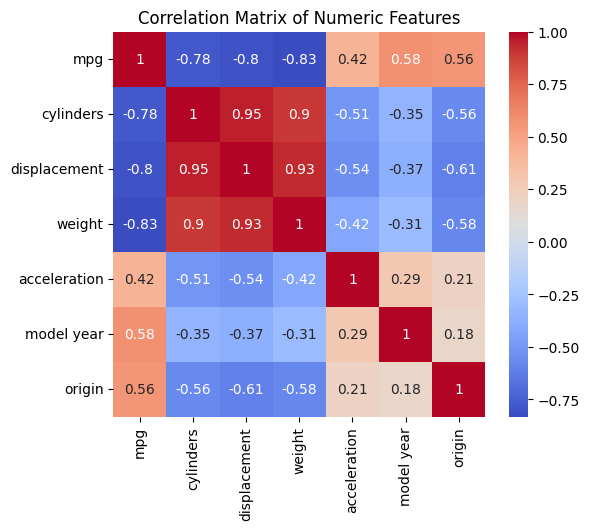

In [45]:

# 1️⃣ Select numeric data only
numeric_df = df.select_dtypes(include='number')

# 2️⃣ Compute correlation matrix
corr_matrix = numeric_df.corr()
# 2️⃣ Drop 'mpg' column
#numeric_df = numeric_df.drop(columns=['mpg'])
# 3️⃣ Sort correlation w.r.t 'mpg'
corr_sorted = corr_matrix[['mpg']].sort_values(by='mpg', ascending=False)
print("Correlation of numeric features with MPG:\n", corr_sorted)

# 4️⃣ Create heatmap of correlation matrix
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


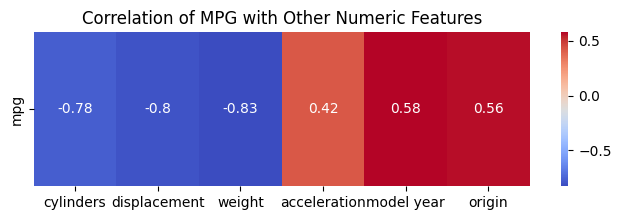

In [50]:

# 1️⃣ Select all numeric columns automatically
numeric_df = df.select_dtypes(include='number')

# 2️⃣ Compute correlation of mpg with all other numeric features
corr_with_mpg = numeric_df.corr()['mpg'].drop('mpg')  # Series of correlations with mpg

# 3️⃣ Convert to DataFrame for heatmap (1-row)
corr_df = corr_with_mpg.to_frame().T

# 4️⃣ Plot heatmap
plt.figure(figsize=(8,2))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation of MPG with Other Numeric Features')
plt.show()
